In [1]:
#################################
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.dates import DateFormatter
import matplotlib.font_manager
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 8,
        "font.size": 8,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
}

mpl.rcParams.update(nice_fonts)

fig_width_pt = 506

# Convert from pt to inches
inches_per_pt = 1 / 72.27

# Golden ratio to set aesthetic figure height
# https://disq.us/p/2940ij3
golden_ratio = (5**.5 - 1) / 2

# Figure width in inches
fig_width_in = fig_width_pt * inches_per_pt
# Figure height in inches
fig_height_in = fig_width_in * golden_ratio

fig_size = (fig_width_in, fig_height_in)

Loading data for meter ElecMeterID(instance=1, building=1, dataset='REDD')     

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     


Done loading data all meters for this chunk.


/Users/christoph/anaconda/envs/attentio-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


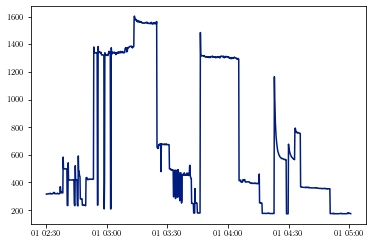

In [2]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import nilmtk
from nilmtk import DataSet, MeterGroup

plt.style.use('seaborn-dark-palette')


redd = DataSet('/Users/christoph/thesis-dev/data/redd2.h5')
elec = redd.buildings[1].elec
main = elec.mains().power_series_all_data()['2011-04-30 22:30':'2011-05-01 01:00'].resample('10S').pad()
plt.figure()
plt.plot(main)
plt.show()

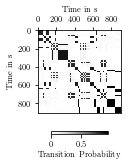

In [3]:
from pyts.image import MarkovTransitionField

fig, ax = plt.subplots(figsize=(7/3, 7/3))

mtf = MarkovTransitionField()
X_mtf = mtf.fit_transform(main.values.reshape((1,-1)))

plt.imshow(X_mtf[0], cmap='Greys', origin='lower')
cbar = plt.colorbar(orientation='horizontal', shrink=0.4, ticks=[0,0.5,0.98])
cbar.set_label('Transition Probability')
cbar.ax.set_xticklabels(['0', '0.5', '1.0'])
plt.xlabel('Time in s')
ax.xaxis.set_ticks([0,200,400,600,800])
plt.ylabel('Time in s')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('MTF.pdf', format='pdf', dpi=1200)
plt.show()

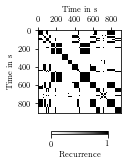

In [4]:
from pyts.image import RecurrencePlot
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(main.values.reshape((1,-1)))

from matplotlib import colors

cmap = colors.ListedColormap(['white', 'black'])
bounds = [0, 0.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(7/3, 7/3))
plt.imshow(X_rp[0], cmap='Greys', origin='lower')
cbar = plt.colorbar(orientation='horizontal', shrink=0.4, cmap=cmap, norm=norm)
cbar.set_label('Recurrence')
cbar.set_ticks([0,1.0])
cbar.ax.set_xticklabels(['0','1'])
plt.xlabel('Time in s')
ax.xaxis.set_ticks([0,200,400,600,800])
plt.ylabel('Time in s')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('RP.pdf', format='pdf', dpi=1200)
plt.show()

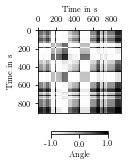

In [5]:
from pyts.image import GramianAngularField

# GASF and GADF
gasf = GramianAngularField( method='summation')
X_gasf = gasf.fit_transform(main.values.reshape((1,-1)))

fig, ax = plt.subplots(figsize=(7/3, 7/3))
plt.imshow(X_gasf[0], cmap='Greys', origin='lower')
cbar = plt.colorbar(orientation='horizontal', shrink=0.4, ticks=[-1.0,0.0,1.0])
cbar.set_label('Angle')
cbar.ax.set_xticklabels(['-1.0', '0.0', '1.0'])
plt.xlabel('Time in s')
ax.xaxis.set_ticks([0,200,400,600,800])
plt.ylabel('Time in s')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('GAF.pdf', format='pdf', dpi=1200)
plt.show()